In [1]:
from sequenzo import *
import pandas as pd

In [2]:
sequence_output_file_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/output/occupational_segregation_paper/sequence_analysis'

broad_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_5_years_or_more.csv')

broad_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5
0,upendra-prakash-3845481a1,male,india,0-10 total work years,Technical computing,Technical computing,Non-computing,Non-computing,Non-computing
1,chandrajit-bhattacharya-927891b6,male,india,0-10 total work years,Non-computing,Non-computing,Technical computing,Technical computing,Technical computing
2,basant-singh-99269834,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
3,dhanush-dhama-52389644,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
4,kalpataru-samanta-66a5a5222,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
...,...,...,...,...,...,...,...,...,...
373754,jhansi-lakshmi-2694ba49,female,us,0-10 total work years,Non-technical computing,Non-technical computing,Non-technical computing,Technical computing,Technical computing
373755,amal-morais-0b8336155,female,us,0-10 total work years,Non-computing,Non-computing,Non-computing,Technical computing,Technical computing
373756,christy-garner-677894213,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
373757,jagadevichikkalli,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing


In [3]:
# Cleaned the columns that contain time

# Sample DataFrame with column names
broad_df.columns  # ['worker_id', 'C1', 'C2', ..., 'C10']

# Rename 'C1' to '1', 'C2' to '2', ..., but keep 'worker_id' as-is
broad_df = broad_df.rename(columns={col: col[1:] for col in broad_df.columns if col.startswith("C")})

# Result:
# ['worker_id', '1', '2', '3', ..., '10']

broad_df

,worker_id,gender,country,cohort,1,2,3,4,5
0,upendra-prakash-3845481a1,male,india,0-10 total work years,Technical computing,Technical computing,Non-computing,Non-computing,Non-computing
1,chandrajit-bhattacharya-927891b6,male,india,0-10 total work years,Non-computing,Non-computing,Technical computing,Technical computing,Technical computing
2,basant-singh-99269834,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
3,dhanush-dhama-52389644,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Technical computing
4,kalpataru-samanta-66a5a5222,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
...,...,...,...,...,...,...,...,...,...
373754,jhansi-lakshmi-2694ba49,female,us,0-10 total work years,Non-technical computing,Non-technical computing,Non-technical computing,Technical computing,Technical computing
373755,amal-morais-0b8336155,female,us,0-10 total work years,Non-computing,Non-computing,Non-computing,Technical computing,Technical computing
373756,christy-garner-677894213,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
373757,jagadevichikkalli,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing


In [4]:
broad_df = broad_df[['worker_id', '1', '2', '3', '4', '5']]
broad_time = list(broad_df.columns)[1:]
broad_states = ['Non-computing', 'Non-technical computing', 'Technical computing']
    
# get distance matrix
broad_data = SequenceData(broad_df, 
                          time=broad_time, 
                          time_type="age", 
                          id_col="worker_id", 
                          states=broad_states)

broad_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 373759
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


SequenceData(373759 sequences, Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing'])

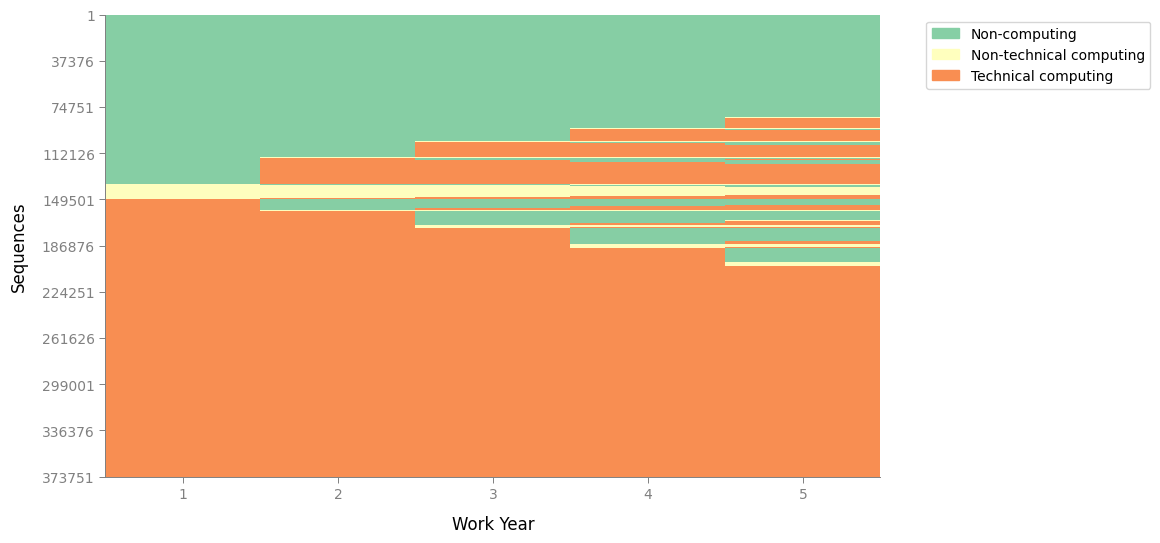

In [5]:
plot_sequence_index(broad_data, xlabel='Work Year', save_as='broad_data_index_plot')

In [12]:
# I have used CLARA
stats_CQI_df = pd.read_csv("stats_CQI.csv")
stats_CQI_df.rename(columns={"Unnamed: 0": "k"}, inplace=True)  # 改列名
stats_CQI_df["k_num"] = stats_CQI_df["k"].str.extract(r"(\d+)").astype(int)  # 提取 cluster 数字
stats_CQI_df = stats_CQI_df.sort_values(by="k_num")  # 按数字排序
stats_CQI_df

,k,Avg dist,PBM,DB,XB,AMS,ARI>0.8,JC>0.8,Best iter,k_num
0,cluster4,0.442439,10.084202,0.497890,0.200465,0.825593,63.0,58.0,16.0,4
1,cluster5,0.331668,11.484720,0.527343,0.150276,0.832880,98.0,67.0,0.0,5
2,cluster6,0.283350,10.927467,0.479417,0.234744,0.843499,127.0,87.0,23.0,6
3,cluster7,0.304094,6.804025,0.968929,0.304094,0.852130,153.0,125.0,212.0,7
4,cluster8,0.269905,6.774351,1.074686,0.269905,0.858837,183.0,157.0,84.0,8
5,cluster9,0.252127,6.594344,0.830463,0.208877,0.832405,200.0,158.0,25.0,9
6,cluster10,0.226454,6.468765,0.720101,0.226454,0.881371,212.0,180.0,40.0,10
7,cluster11,0.208422,6.927112,0.912203,0.172669,0.849989,223.0,188.0,120.0,11
8,cluster12,0.201036,5.834268,0.989270,0.201036,0.884935,235.0,212.0,84.0,12
9,cluster13,0.176161,6.942541,0.879447,0.176161,0.900447,237.0,210.0,120.0,13


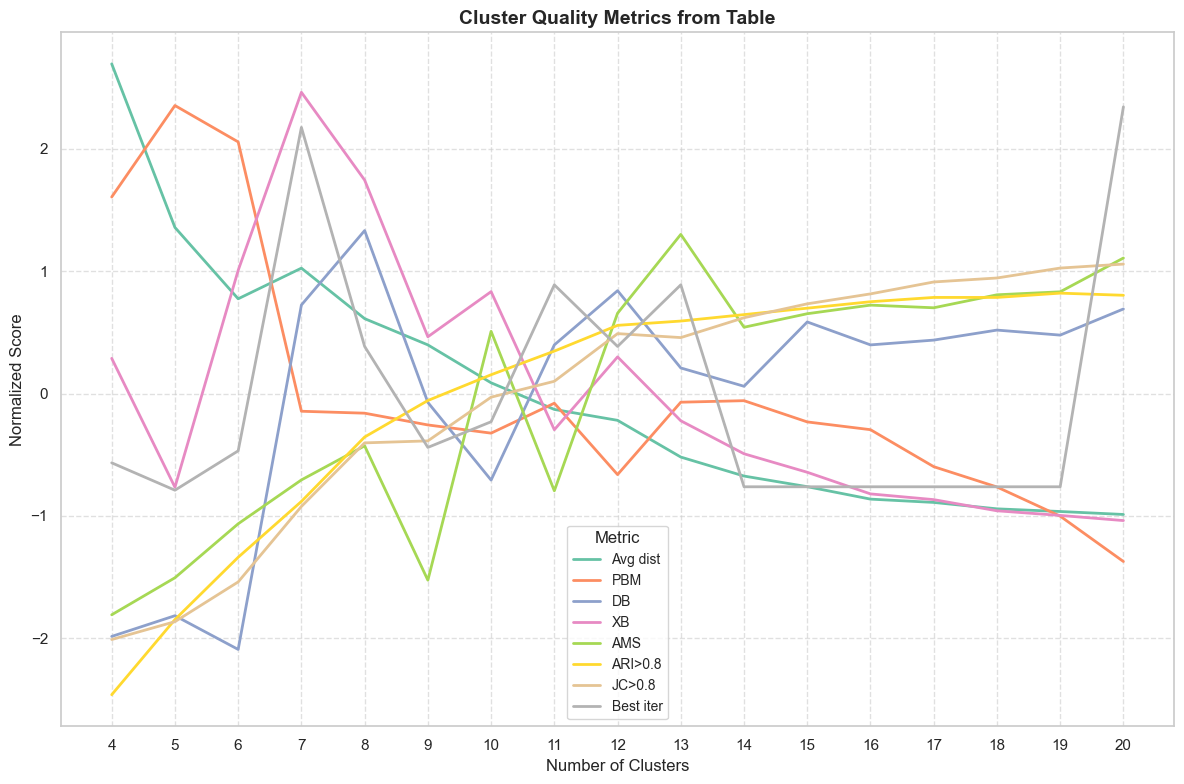

In [14]:
plot_scores_from_dataframe(stats_CQI_df, k_col="k_num", save_as='clara_visualization')

In [30]:
membership_clustering = pd.read_csv('membership_clustering.csv')

membership_clustering.rename(columns={"Unnamed: 0": "id"}, inplace=True)  # 改列名

membership_clustering_cluster_5 = membership_clustering[['id', 'cluster5']]

membership_clustering_cluster_5.rename(columns={"Unnamed: 0": "id", "cluster5": "Cluster ID"}, inplace=True)  # 改列名

membership_clustering_cluster_5

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_3561/1542562752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  membership_clustering_cluster_5.rename(columns={"Unnamed: 0": "id", "cluster5": "Cluster ID"}, inplace=True)  # 改列名


,id,Cluster ID
0,upendra-prakash-3845481a1,2
1,chandrajit-bhattacharya-927891b6,4
2,basant-singh-99269834,1
3,dhanush-dhama-52389644,1
4,kalpataru-samanta-66a5a5222,1
...,...,...
373754,jhansi-lakshmi-2694ba49,5
373755,amal-morais-0b8336155,4
373756,christy-garner-677894213,3
373757,jagadevichikkalli,3


KeyboardInterrupt: 

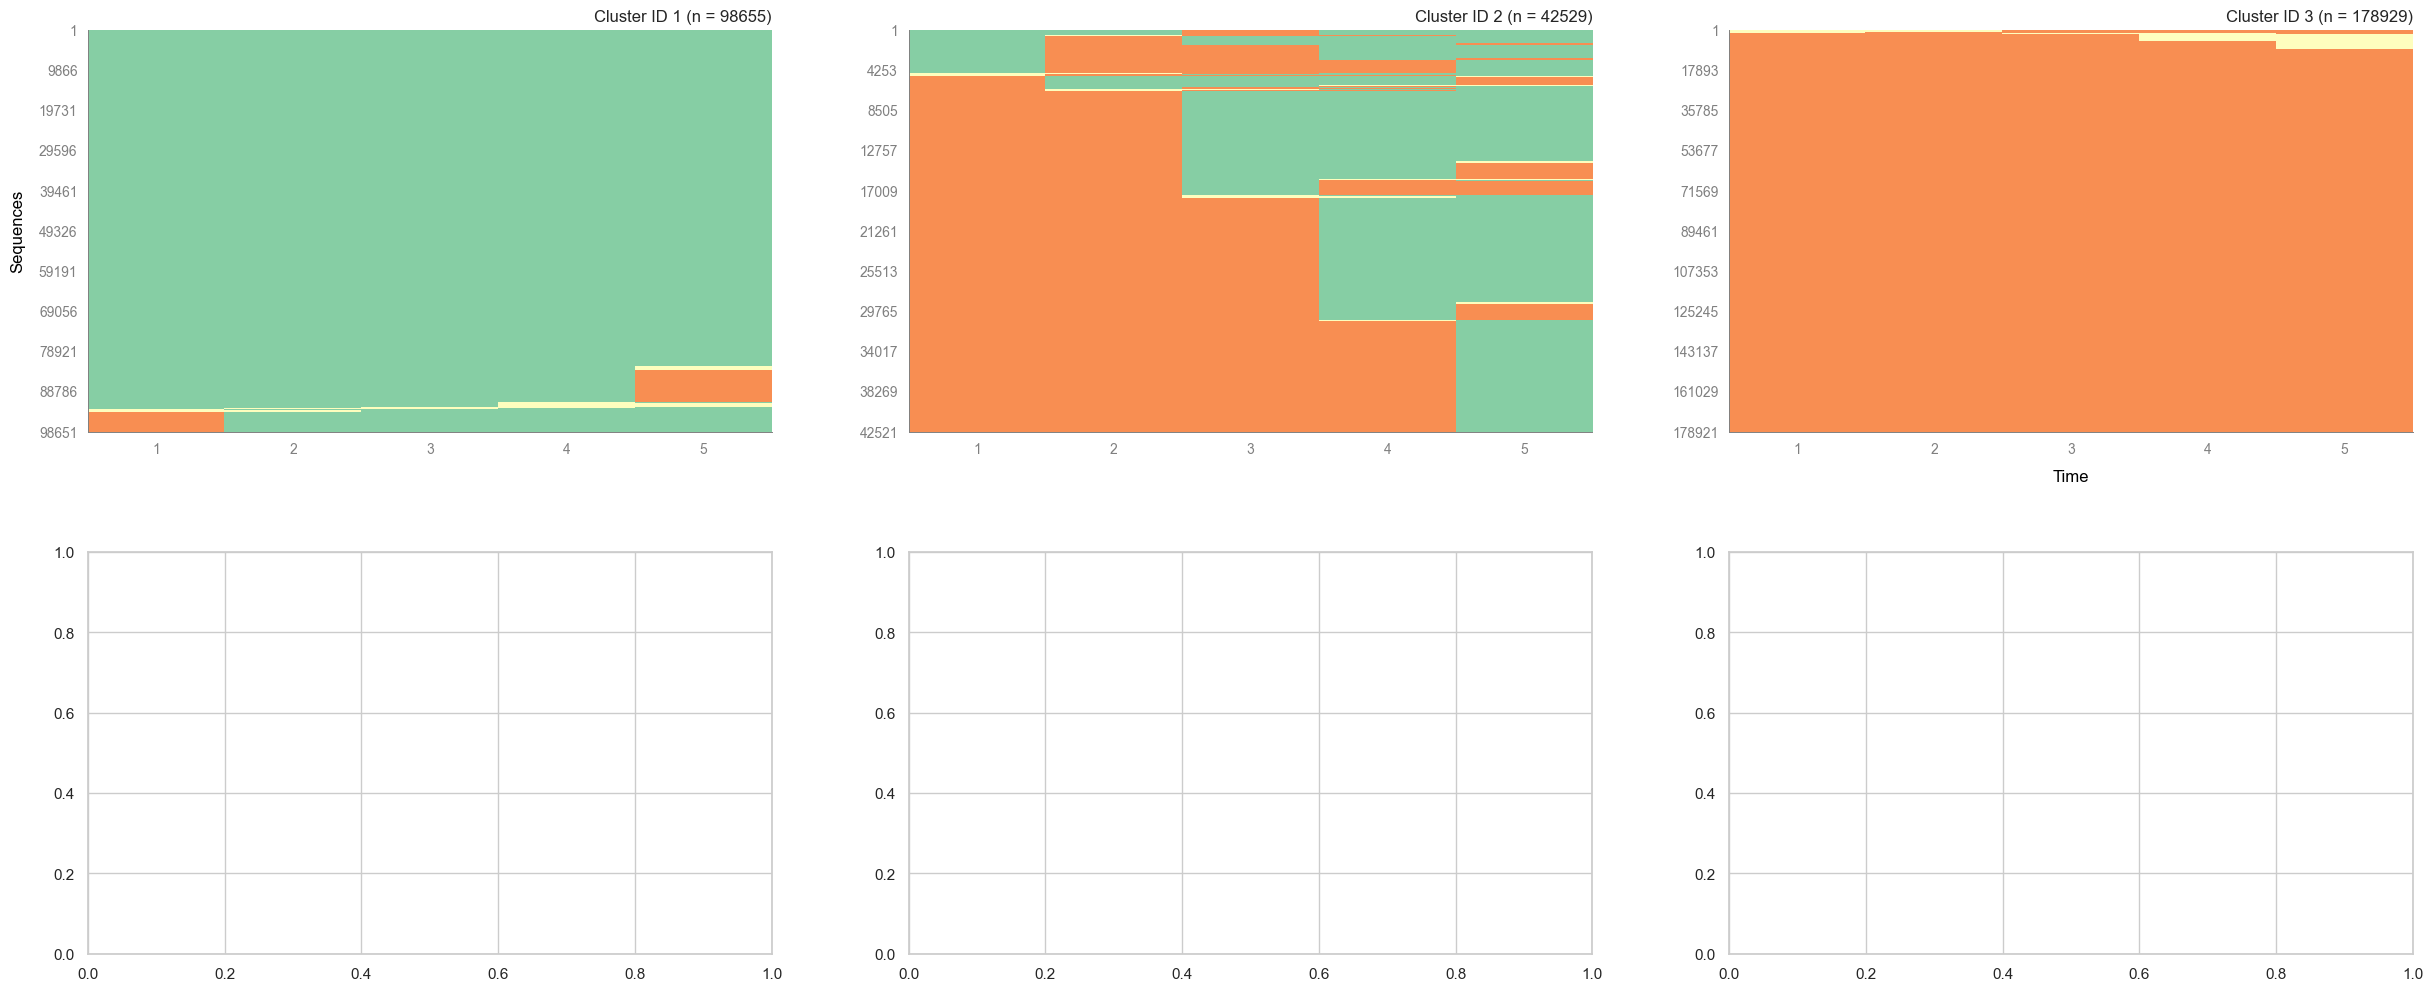

In [20]:
plot_sequence_index(seqdata=broad_data,
                    id_group_df=membership_clustering_cluster_5,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_cluster_5')


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 98655
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


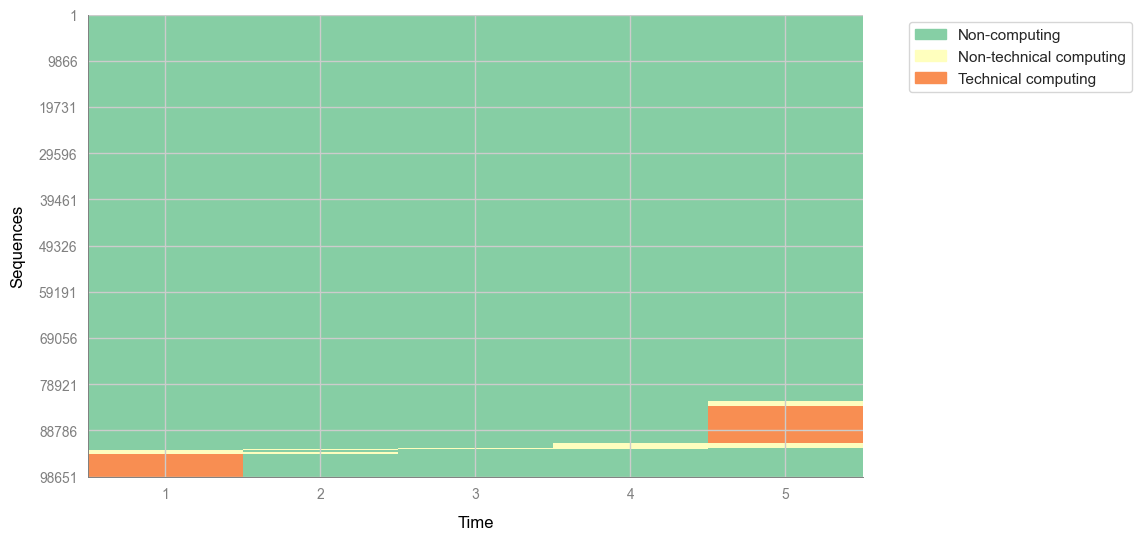


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 42529
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


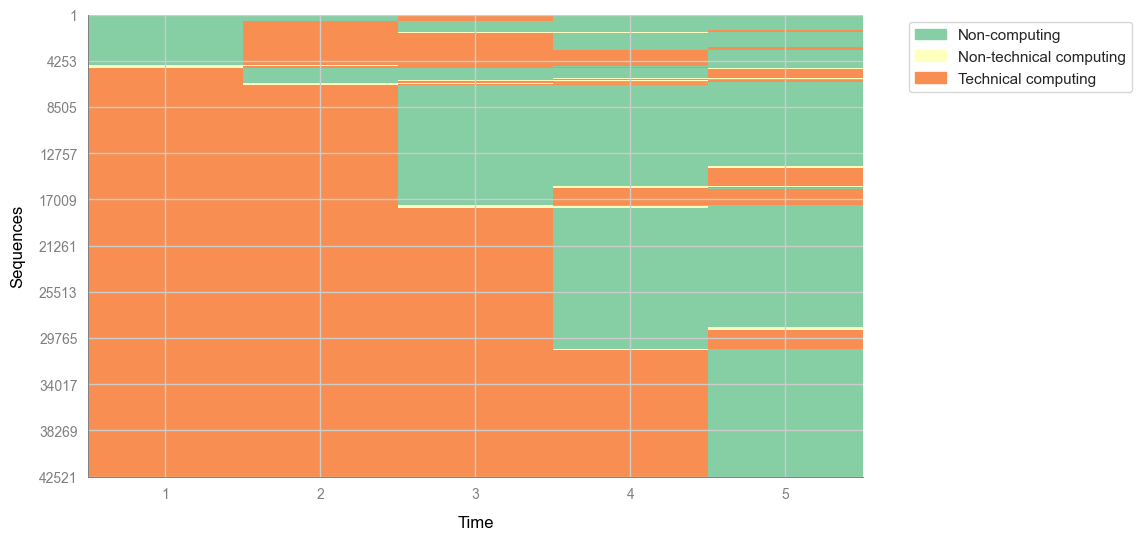


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 178929
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


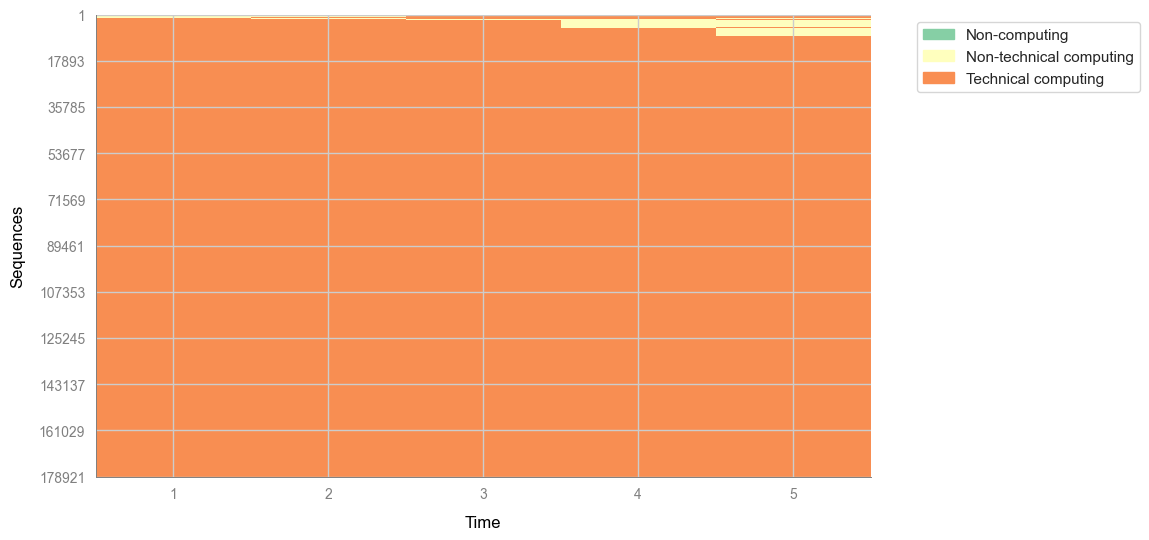


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 40228
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


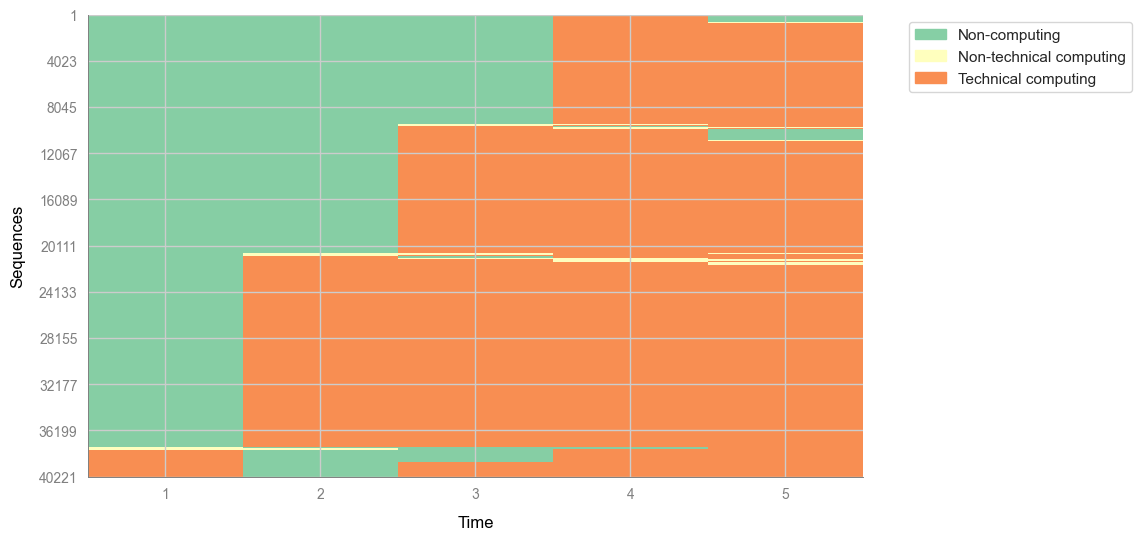


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 13418
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


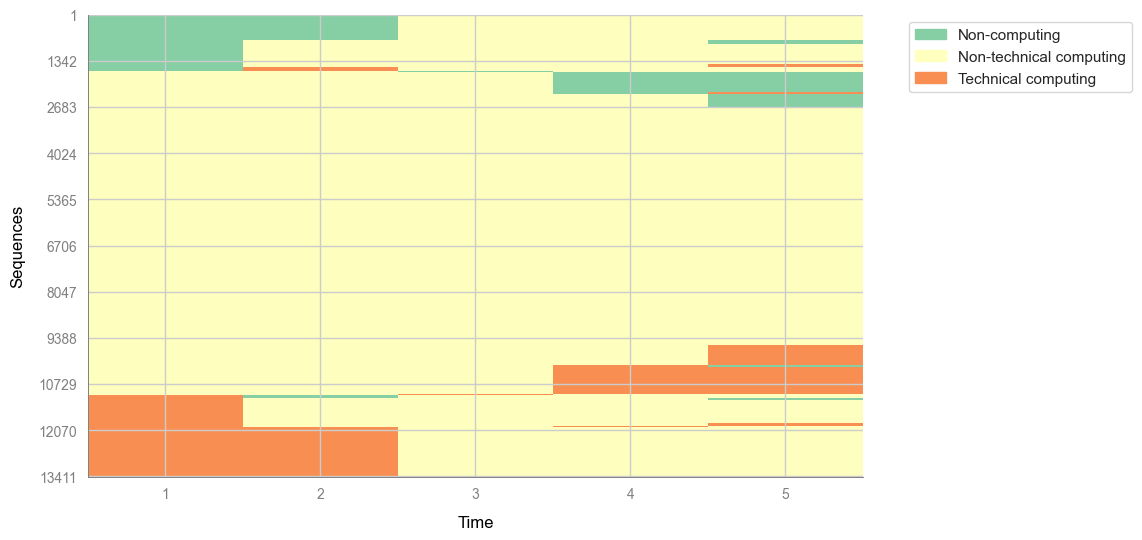

In [41]:
cluster_id_list = list(range(1, 6))

for cluster_id in cluster_id_list:
    
    local_membership_clustering_cluster_5 = membership_clustering_cluster_5[membership_clustering_cluster_5['Cluster ID']==cluster_id]
    
    local_cluster_id_list = list(local_membership_clustering_cluster_5['id'])
    
    local_df = broad_df[broad_df['worker_id'].isin(local_cluster_id_list)]
    
    local_sequence_data = SequenceData(local_df, 
                          time=broad_time, 
                          time_type="age", 
                          id_col="worker_id", 
                          states=broad_states)
    
    # TODO: when id_col = id, which is wrong, the error is confusing. We need to go back to it.
    
    graph_name = f'when_5_clusters/cluster_index_plot_cluster_{cluster_id}'
    
    plot_sequence_index(seqdata=local_sequence_data,
                    categories='Cluster ID',
                    save_as=graph_name)
    

In [ ]:
# TODO: 上面的远比上上面的要快太多了，之前二十多分钟没搞完，现在几秒就搞完了。就是要把灰色的线给搞掉才行。

## 6 clusters

In [42]:
membership_clustering_cluster_6 = membership_clustering[['id', 'cluster6']]

membership_clustering_cluster_6.rename(columns={"Unnamed: 0": "id", "cluster6": "Cluster ID"}, inplace=True)  # 改列名

membership_clustering_cluster_6

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_3561/3562959878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  membership_clustering_cluster_6.rename(columns={"Unnamed: 0": "id", "cluster6": "Cluster ID"}, inplace=True)  # 改列名


,id,Cluster ID
0,upendra-prakash-3845481a1,2
1,chandrajit-bhattacharya-927891b6,4
2,basant-singh-99269834,5
3,dhanush-dhama-52389644,5
4,kalpataru-samanta-66a5a5222,1
...,...,...
373754,jhansi-lakshmi-2694ba49,6
373755,amal-morais-0b8336155,5
373756,christy-garner-677894213,3
373757,jagadevichikkalli,3



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 90805
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


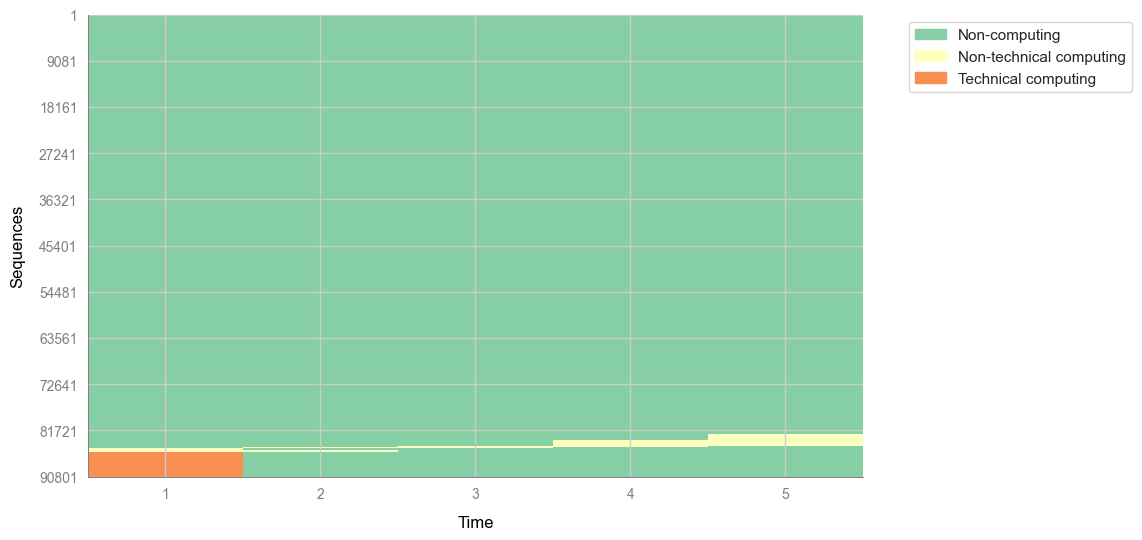


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 41721
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


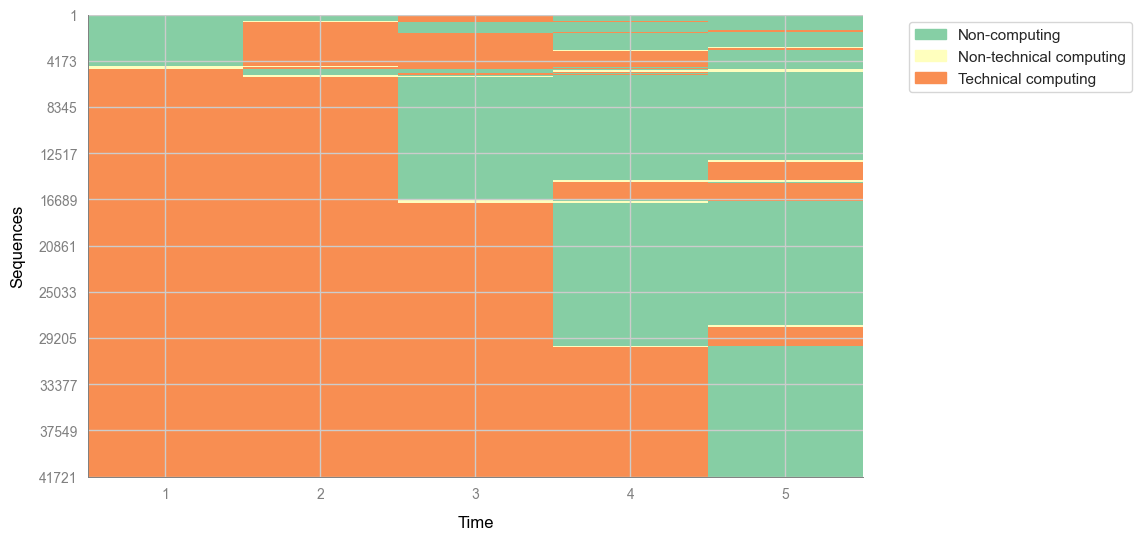


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 178929
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


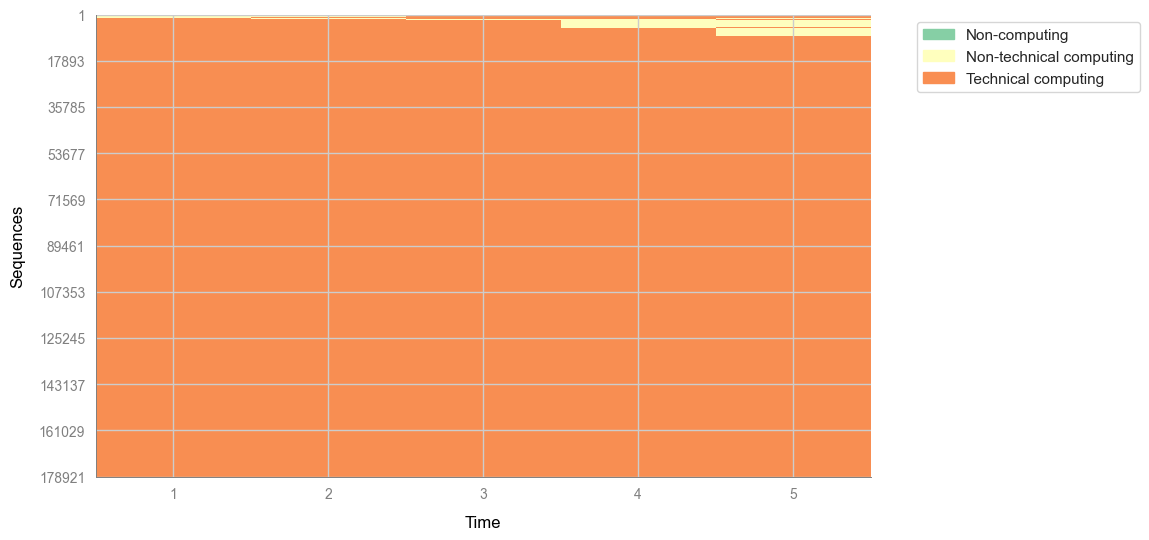


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 27972
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


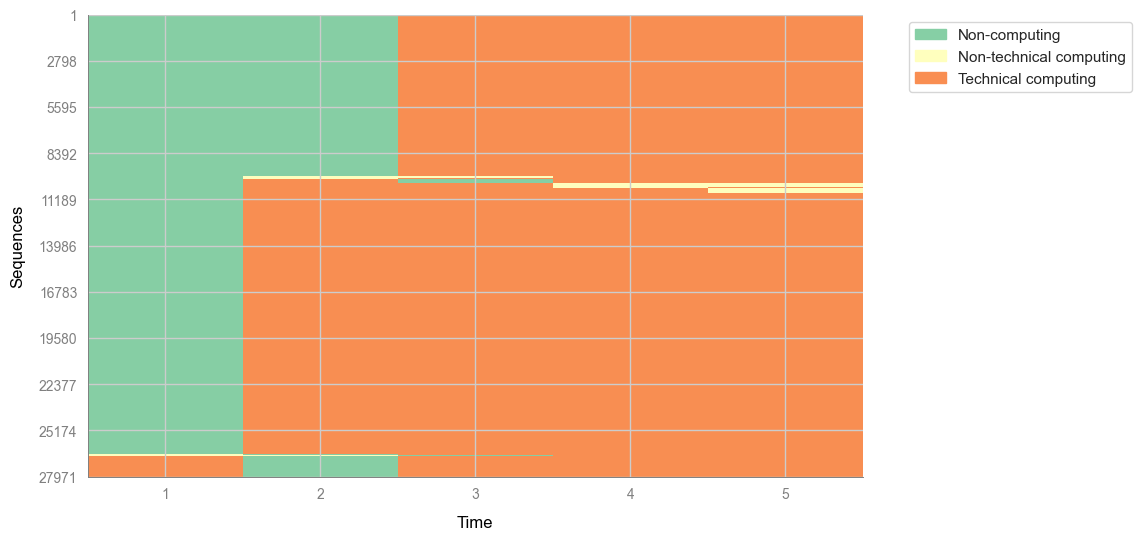


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 20914
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


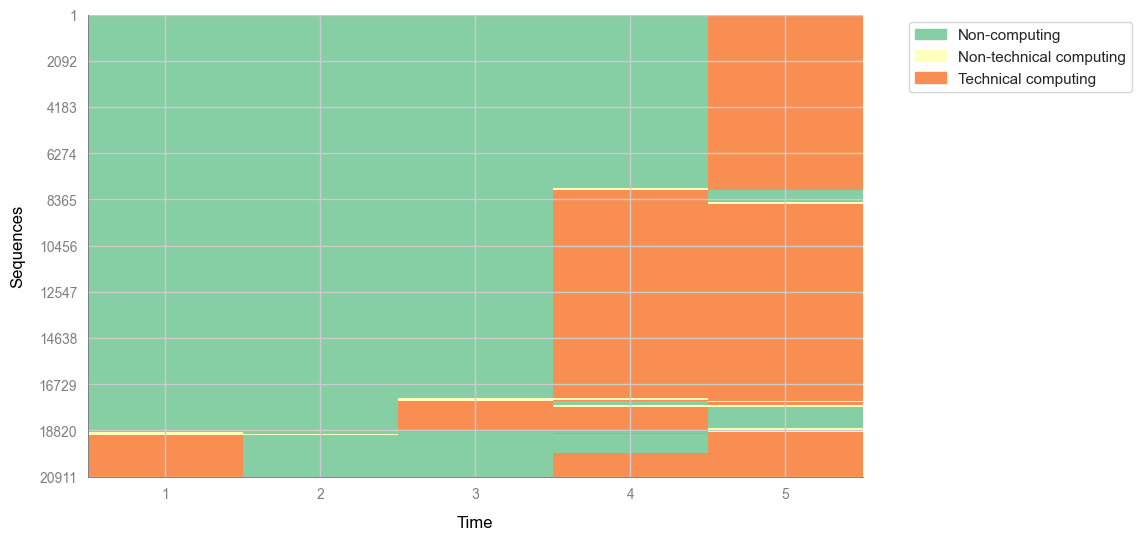


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 13418
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


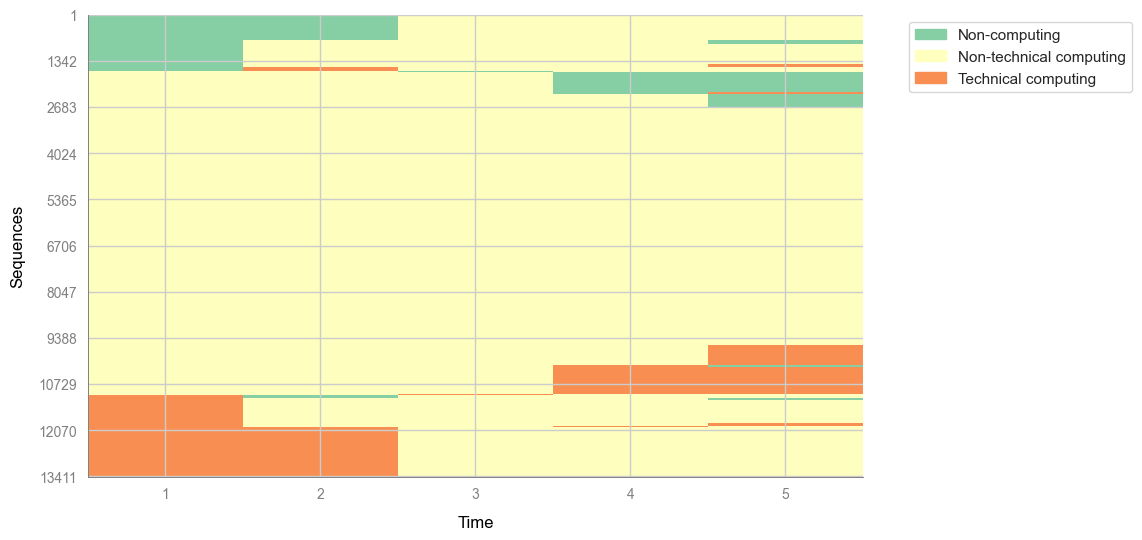

In [43]:
cluster_id_list = list(range(1, 7))

for cluster_id in cluster_id_list:
    
    local_membership_clustering_cluster_6 = membership_clustering_cluster_6[membership_clustering_cluster_6['Cluster ID']==cluster_id]
    
    local_cluster_id_list = list(local_membership_clustering_cluster_6['id'])
    
    local_df = broad_df[broad_df['worker_id'].isin(local_cluster_id_list)]
    
    local_sequence_data = SequenceData(local_df, 
                          time=broad_time, 
                          time_type="age", 
                          id_col="worker_id", 
                          states=broad_states)
    
    # TODO: when id_col = id, which is wrong, the error is confusing. We need to go back to it.
    
    graph_name = f'when_6_clusters/cluster_index_plot_cluster_{cluster_id}'
    
    plot_sequence_index(seqdata=local_sequence_data,
                    categories='Cluster ID',
                    save_as=graph_name)
    

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_3561/1601897950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_membership_clustering.rename(columns={"Unnamed: 0": "id", cluster_name: "Cluster ID"}, inplace=True)  # 改列名



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 97787
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


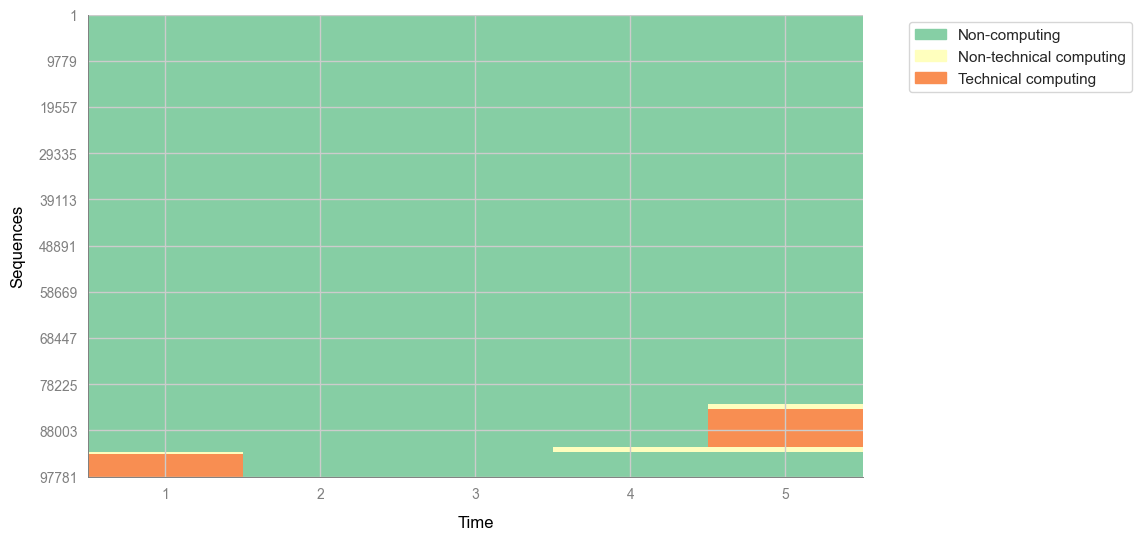


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 42310
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


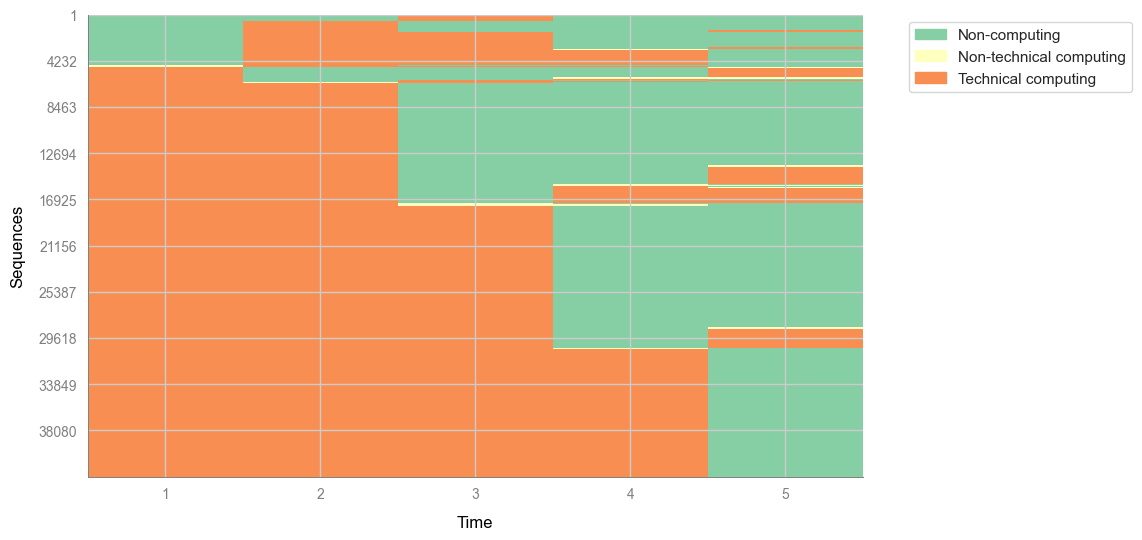


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 178443
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


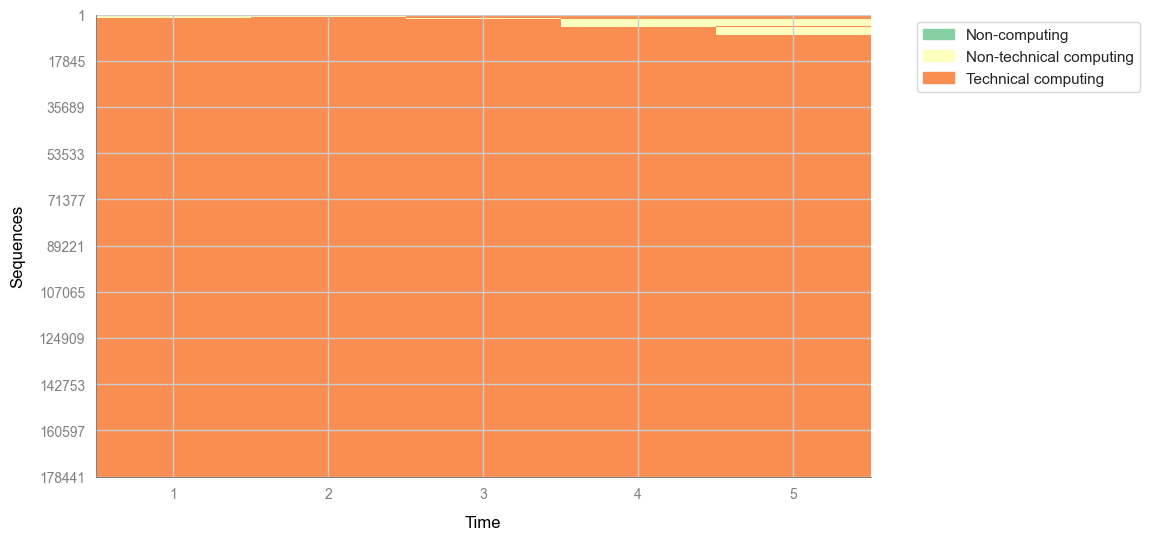


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 24126
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


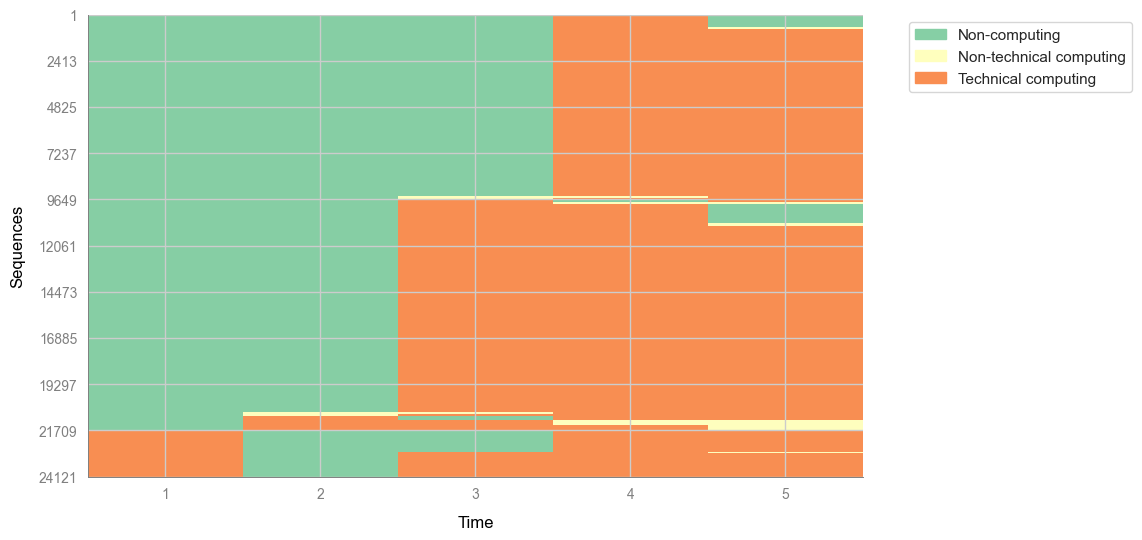


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15844
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


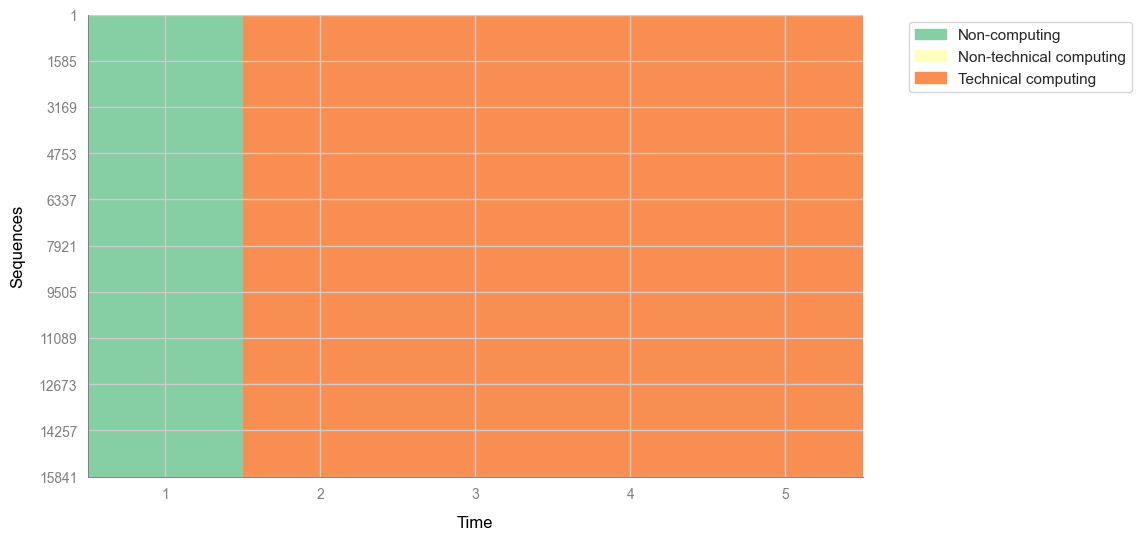


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 2684
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


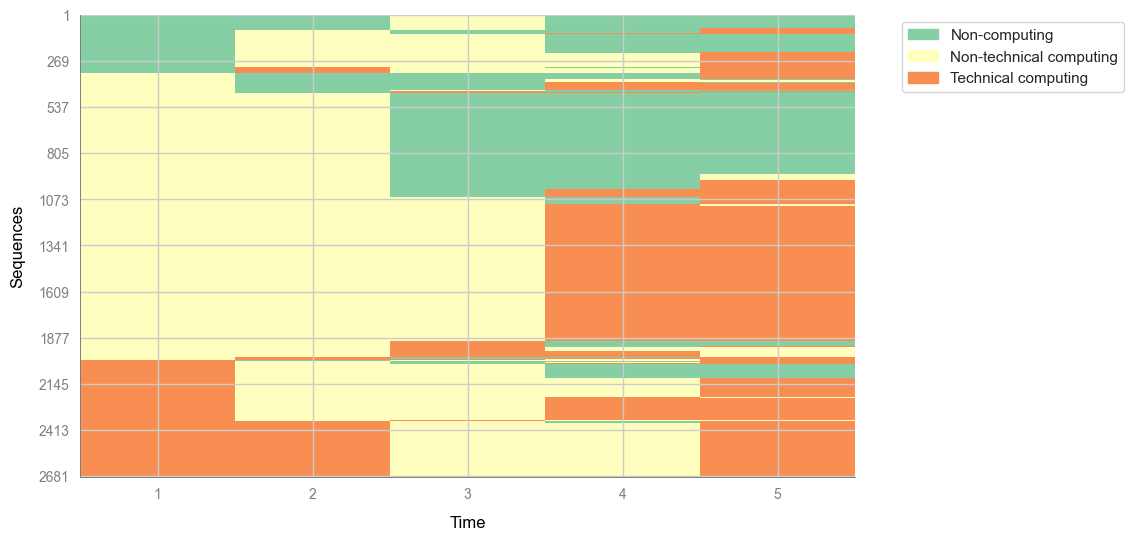


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 12565
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


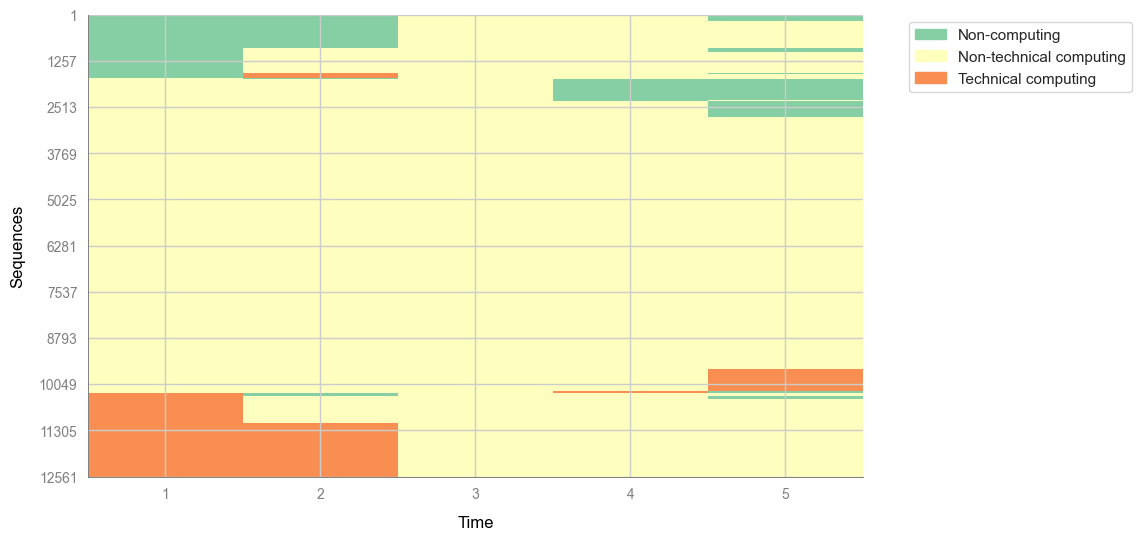

/var/folders/kk/h5dw00r5357gxylmmb8zl7qw0000gn/T/ipykernel_3561/1601897950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_membership_clustering.rename(columns={"Unnamed: 0": "id", cluster_name: "Cluster ID"}, inplace=True)  # 改列名



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 98354
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


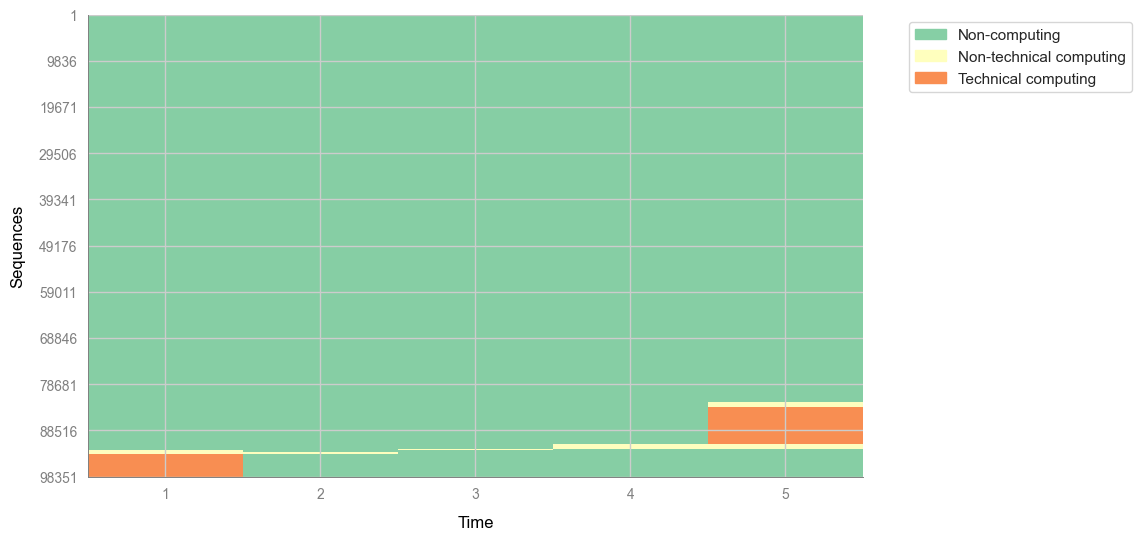


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 42288
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


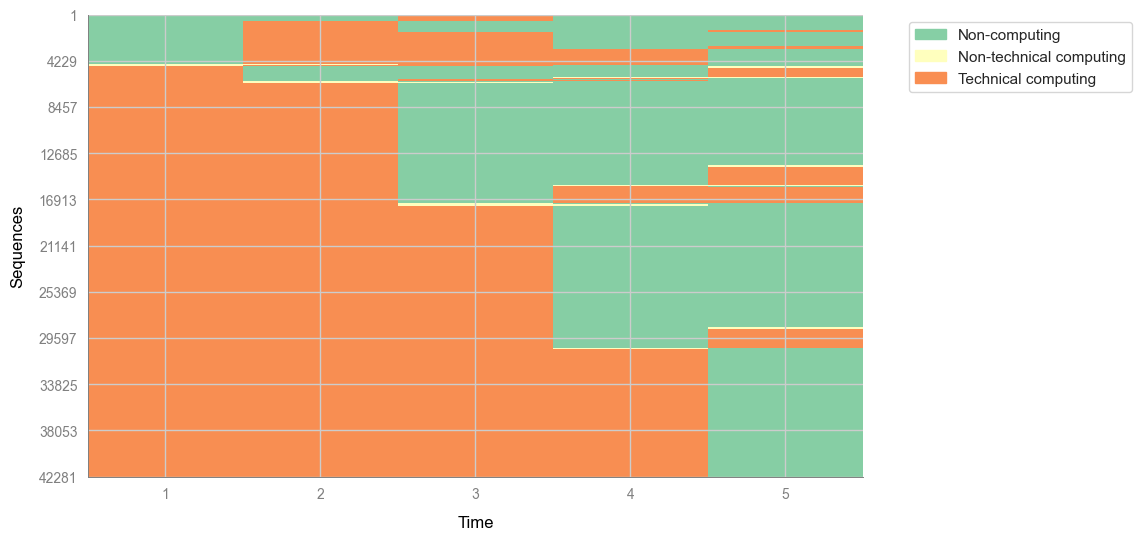


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 175135
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


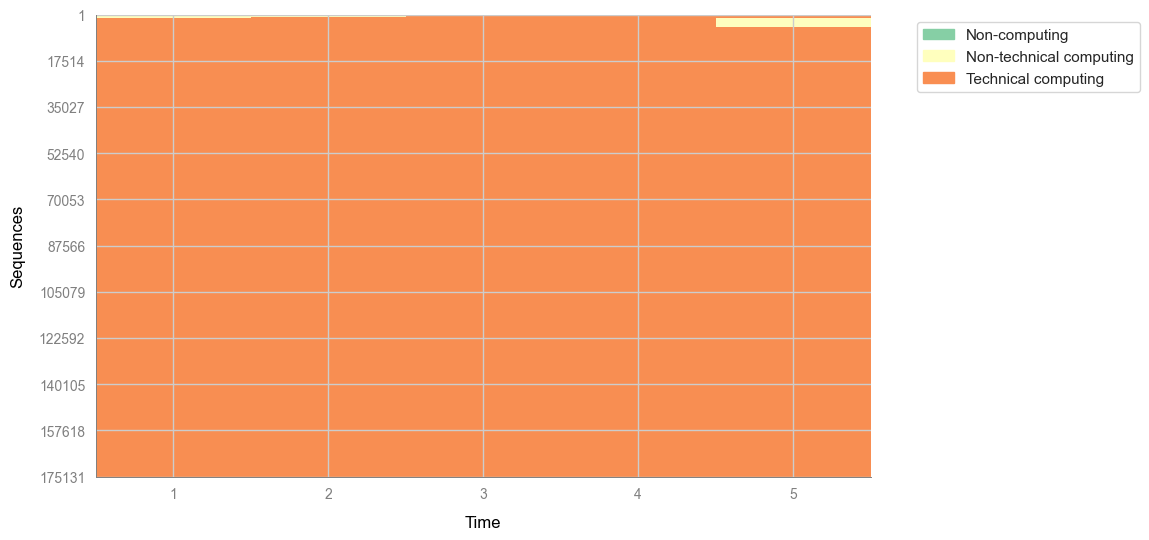


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 23188
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


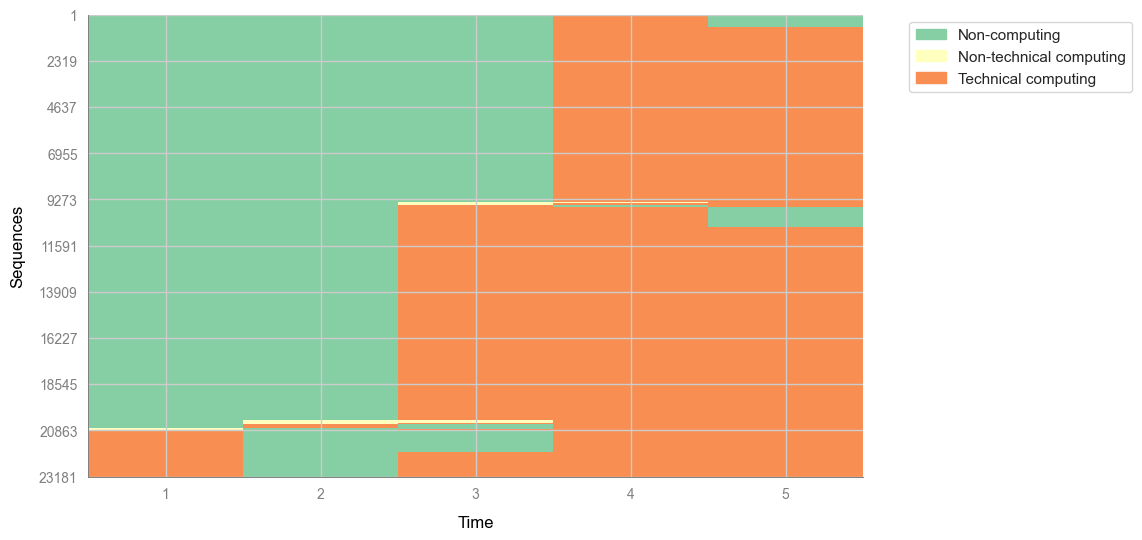


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 6412
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


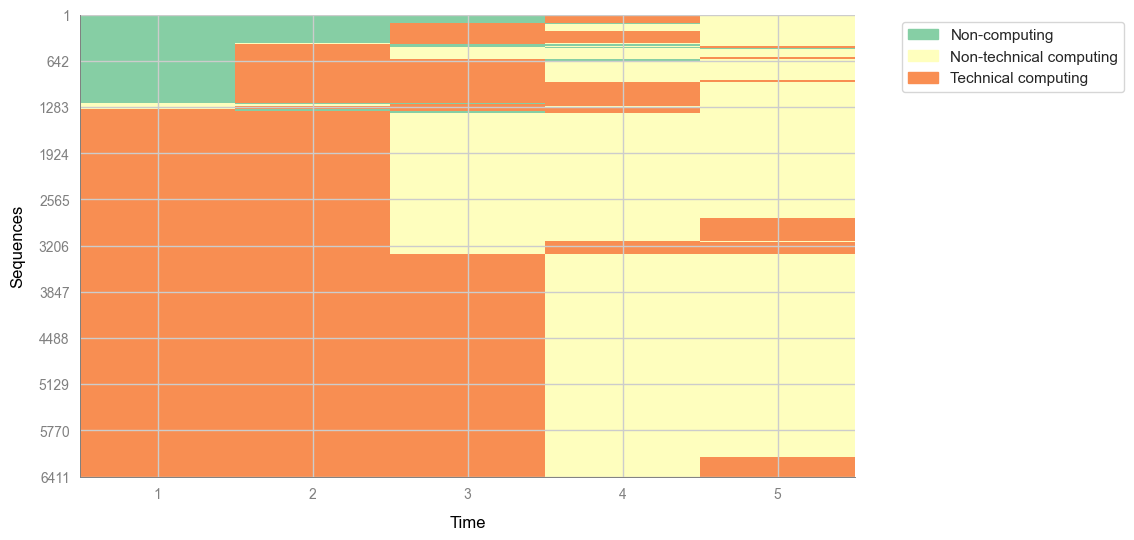


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15844
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


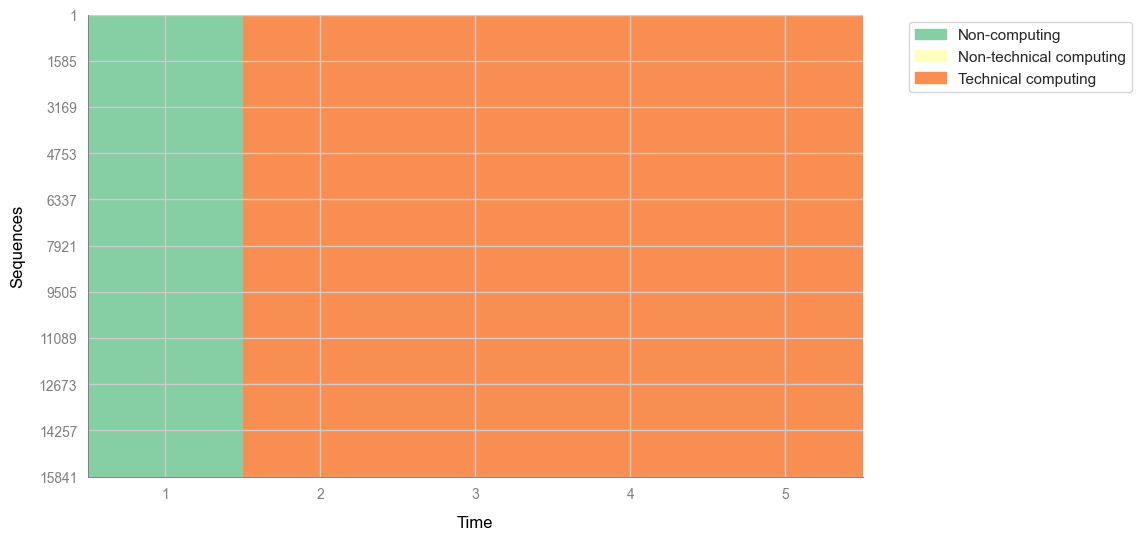


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 3600
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


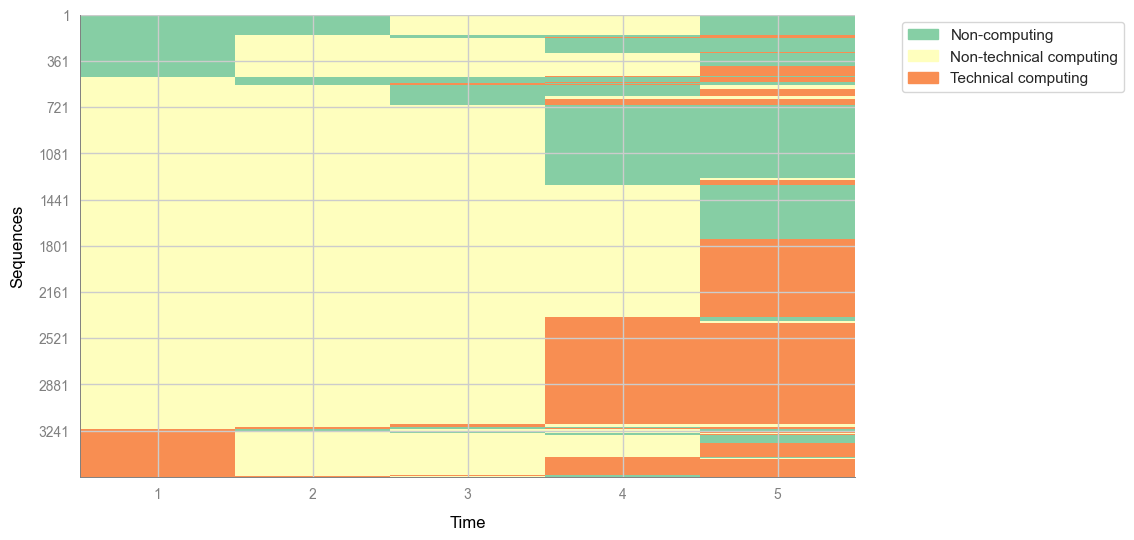


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 8938
[>] Min/Max sequence length: 5 / 5
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


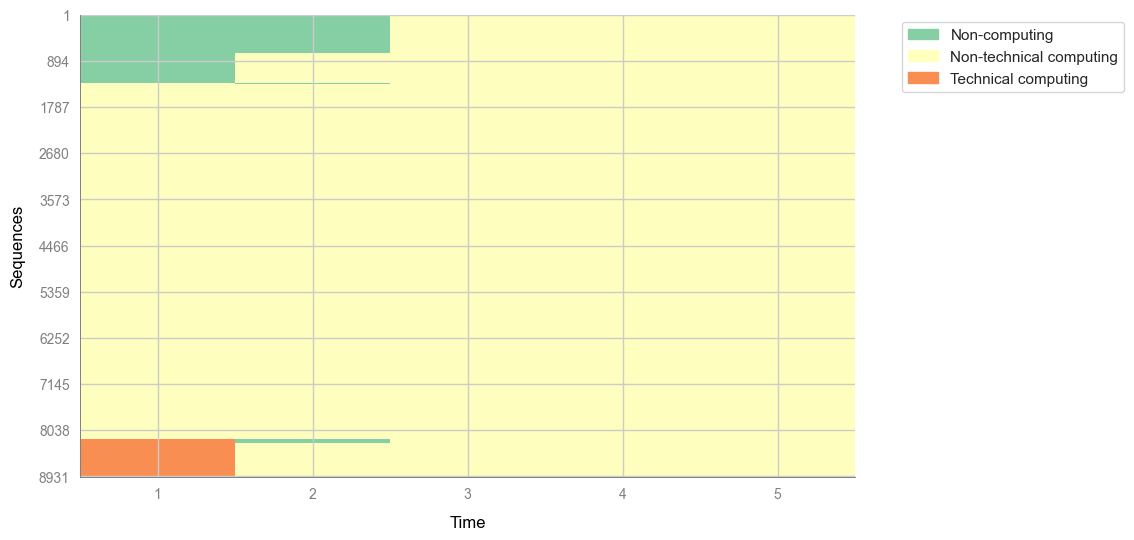

In [46]:
tested_num_clusters = [7, 8]

for tested_num_cluster in tested_num_clusters:
    
    cluster_name = f'cluster{tested_num_cluster}'
    
    local_membership_clustering = membership_clustering[['id', cluster_name]]

    local_membership_clustering.rename(columns={"Unnamed: 0": "id", cluster_name: "Cluster ID"}, inplace=True)  # 改列名

    cluster_id_list = list(range(1, tested_num_cluster+1))

    for cluster_id in cluster_id_list:
        
        local_membership_clustering_cluster = local_membership_clustering[local_membership_clustering['Cluster ID']==cluster_id]
        
        local_cluster_id_list = list(local_membership_clustering_cluster['id'])
        
        local_df = broad_df[broad_df['worker_id'].isin(local_cluster_id_list)]
        
        local_sequence_data = SequenceData(local_df, 
                              time=broad_time, 
                              time_type="age", 
                              id_col="worker_id", 
                              states=broad_states)
        
        # TODO: when id_col = id, which is wrong, the error is confusing. We need to go back to it.
        
        graph_name = f'when_{tested_num_cluster}_clusters/cluster_index_plot_cluster_{cluster_id}'
        
        plot_sequence_index(seqdata=local_sequence_data,
                        categories='Cluster ID',
                        save_as=graph_name)
        


## Selected 8 clusters

In [48]:
local_membership_clustering

,id,Cluster ID
0,upendra-prakash-3845481a1,2
1,chandrajit-bhattacharya-927891b6,4
2,basant-singh-99269834,1
3,dhanush-dhama-52389644,1
4,kalpataru-samanta-66a5a5222,1
...,...,...
373754,jhansi-lakshmi-2694ba49,7
373755,amal-morais-0b8336155,4
373756,christy-garner-677894213,3
373757,jagadevichikkalli,3


In [49]:
local_membership_clustering['Cluster ID'].value_counts()

Cluster ID
3    175135
1     98354
2     42288
4     23188
6     15844
8      8938
5      6412
7      3600
Name: count, dtype: int64

In [60]:
# Merge country and gender

full_broad_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_5_years_or_more.csv')

worker_id_gender_country_df = full_broad_df[['worker_id', 'gender', 'country']]

local_membership_clustering = local_membership_clustering.rename(columns={'id': 'worker_id'})

broad_8_cluster_df = worker_id_gender_country_df.merge(local_membership_clustering, on=['worker_id'])

broad_8_cluster_df

,worker_id,gender,country,Cluster ID
0,upendra-prakash-3845481a1,male,india,2
1,chandrajit-bhattacharya-927891b6,male,india,4
2,basant-singh-99269834,male,india,1
3,dhanush-dhama-52389644,male,india,1
4,kalpataru-samanta-66a5a5222,male,india,1
...,...,...,...,...
373754,jhansi-lakshmi-2694ba49,female,us,7
373755,amal-morais-0b8336155,female,us,4
373756,christy-garner-677894213,female,us,3
373757,jagadevichikkalli,female,us,3


In [61]:
broad_8_cluster_df.to_csv('broad_sequences_8_clusters_membership_table.csv', index=False)